# PUBG Exploratory Data Ananlysis (EDA)

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


# Understanding the dataset

**Data Set Information**

**Features**

|Feature|Description|
|-----|-----|
|DBNOs|Number of enemy players knocked.|
|assists|Number of enemy players this player damaged that were killed by teammates.|
|boosts|Number of boost items used.|
|damageDealt|Total damage dealt. Note: Self inflicted damage is subtracted.|
|headshotKills|Number of enemy players killed with headshots.|
|heals|Number of healing items used.|
|Id|Player’s Id|
|killPlace|Ranking in match of number of enemy players killed.|
|killPoints|Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.|
|killStreaks|Max number of enemy players killed in a short amount of time.|
|kills|Number of enemy players killed.|
|longestKill|Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.|
|matchDuration|Duration of match in seconds.|
|matchId|ID to identify matches. There are no matches that are in both the training and testing set.|
|matchType|String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.|
|rankPoints|Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.|
|revives|Number of times this player revived teammates|.
|rideDistance|Total distance traveled in vehicles measured in meters.|
|roadKills|Number of kills while in a vehicle.|
|swimDistance|Total distance traveled by swimming measured in meters.|
|teamKills|Number of times this player killed a teammate.|
|vehicleDestroys|Number of vehicles destroyed.|
|walkDistance|Total distance traveled on foot measured in meters.|
|weaponsAcquired|Number of weapons picked up.|
|winPoints|Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.|
|groupId|ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.|
|numGroups|Number of groups we have data for in the match.|
|maxPlace|Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.|
|winPlacePerc|The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.|

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset in the variable called 'df' and setting the index column as 'Id'

df= pd.read_csv('data.csv', index_col='Id')

In [3]:
df.head()  # To view top 5 entries in the dataset.

# in order to view bottom 5 entries, we can do
#df.tail()

#in order to view more than 5 entries, we can enter any integer value into '()'.
#Ex: df.head(10) or df.tail(15), etc

,Unnamed: 0,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,2093518,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
43e4be7ad72cc7,3701672,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
9a68690e31fdff,2059784,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
b147e1bd448fc4,1302036,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
d818b4edd59612,297180,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
# Now, we let us see all the column names.
df.columns

Index(['Unnamed: 0', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [5]:
# We can see that the column named 'Unnamed: 0' can be removed from the dataset as it is not clear, what it represents.

df= df.drop(['Unnamed: 0'], axis=1)  # If axis=0, it consitutes row operation. Since we have to remove the column, we do axis=1.

In [6]:
df.head(2)

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,...,0,0.0,0,0.0,0,0,151.3,1,1525,0.0667
43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,...,0,0.0,0,0.0,0,0,1918.0,7,1516,0.5862


In [7]:
# Now let us check for the shape of the dataset and also that are any null values present in our dataset.
# For that,

print('shape of the dataset=', df.shape)

print(' \nThe null count of each column of the dataset are as follows:')
df.isnull().sum()

shape of the dataset= (1111742, 28)
 
The null count of each column of the dataset are as follows:


groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

From observing above information, we can see that the shape of the dataset is (1111742, 28). This means that the dataset has 1111742 rows and 28 columns.

Later we can notice that none, but only 1 column has 1 null value. The name of that column is 'winPlacePerc'.

In [8]:
# To view the null row from the dataset:

df[df['winPlacePerc'].isnull() == True]

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)

Numerical Features:
                assists  boosts  damageDealt  DBNOs  headshotKills  heals  \
Id                                                                          
a3e3cea9f2e314        0       0        25.93      0              0      0   
43e4be7ad72cc7        0       0        36.71      0              0      0   
9a68690e31fdff        0       1        47.73      0              0      0   
b147e1bd448fc4        0       0         0.00      0              0      0   
d818b4edd59612        0       2       100.00      0              0      3   

                killPlace  killPoints  kills  killStreaks  ...  revives  \
Id                                                         ...            
a3e3cea9f2e314         84        1437      0            0  ...        0   
43e4be7ad72cc7         57        1225      0            0  ...        0   
9a68690e31fdff         50           0      0            0  ...        0   
b147e1bd448fc4         56        1286      0            0  ...   

groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

### Detect outliers in the continuous columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond **(third quartile + 1.5xIQR)** and below **(first quartile - 1.5xIQR)**. 

- The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of *IQR* 

You can even modify the function below to capture the outliers as per their other definitions. 

In [10]:
# Function to detect outliers in every feature
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,assists,194611
1,boosts,35533
2,damageDealt,54026
3,DBNOs,73607
4,headshotKills,187930
5,heals,81625
6,killPlace,0
7,killPoints,0
8,kills,129163
9,killStreaks,13391


### Observations :
- As per the IQR methodology, there are outliers in majority of the columns.

## EDA & Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

## Univariate analysis

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.


#### Number of enemys the player killed:
This is the number of enemy players that were killed by each player.

In [13]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players'.format(df['kills'].mean()))
print('50% of people have ',df['kills'].quantile(0.50),' kills or less')
print('75% of people have ',df['kills'].quantile(0.75),' kills or less')
print('99% of people have ',df['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', df['kills'].max())

The average person kills 0.9255 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


The other way to view this statistical data is in the form of graph as shown. Here is a plot of the number of players that make 1, 2, 3, ... 8+ kills in a game!!

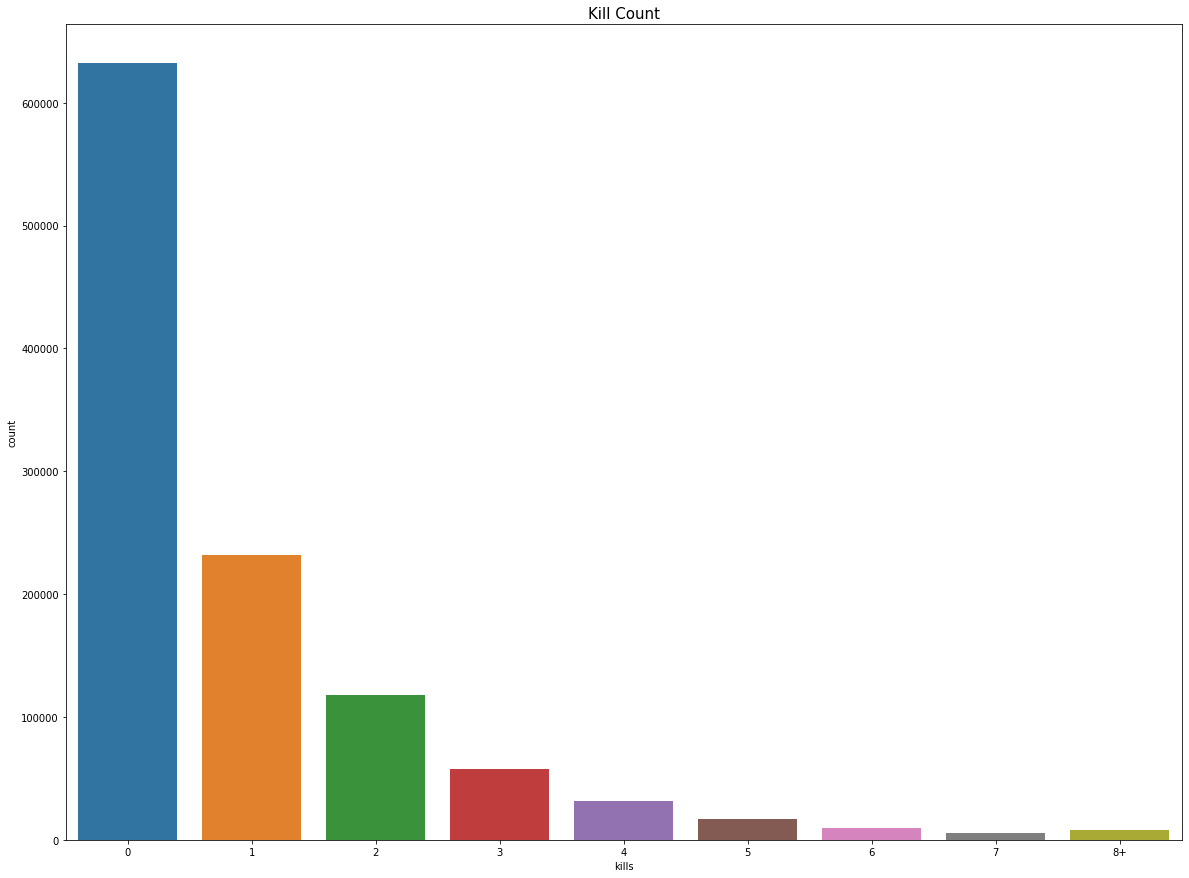

In [15]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()

#### Maximum number of enemy players killed in a short time.
This is the number of enemy players killed in a short time by each player.

In [16]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players in a short time'.format(df['killStreaks'].mean()))
print('50% of people have ',df['killStreaks'].quantile(0.50),' kills or less in a short time')
print('75% of people have ',df['killStreaks'].quantile(0.75),' kills or less in a short time')
print('99% of people have ',df['killStreaks'].quantile(0.99),' kills or less in a short time')
print('While the most kills in a row recorded in the data is', df['killStreaks'].max())

The average person kills 0.5449 players in a short time
50% of people have  0.0  kills or less in a short time
75% of people have  1.0  kills or less in a short time
99% of people have  3.0  kills or less in a short time
While the most kills in a row recorded in the data is 20


The other way to view this statistical data is in the form of graph as shown. Here is a plot of the number of players that make 1, 2, 3,4+ killStreaks in a game!!

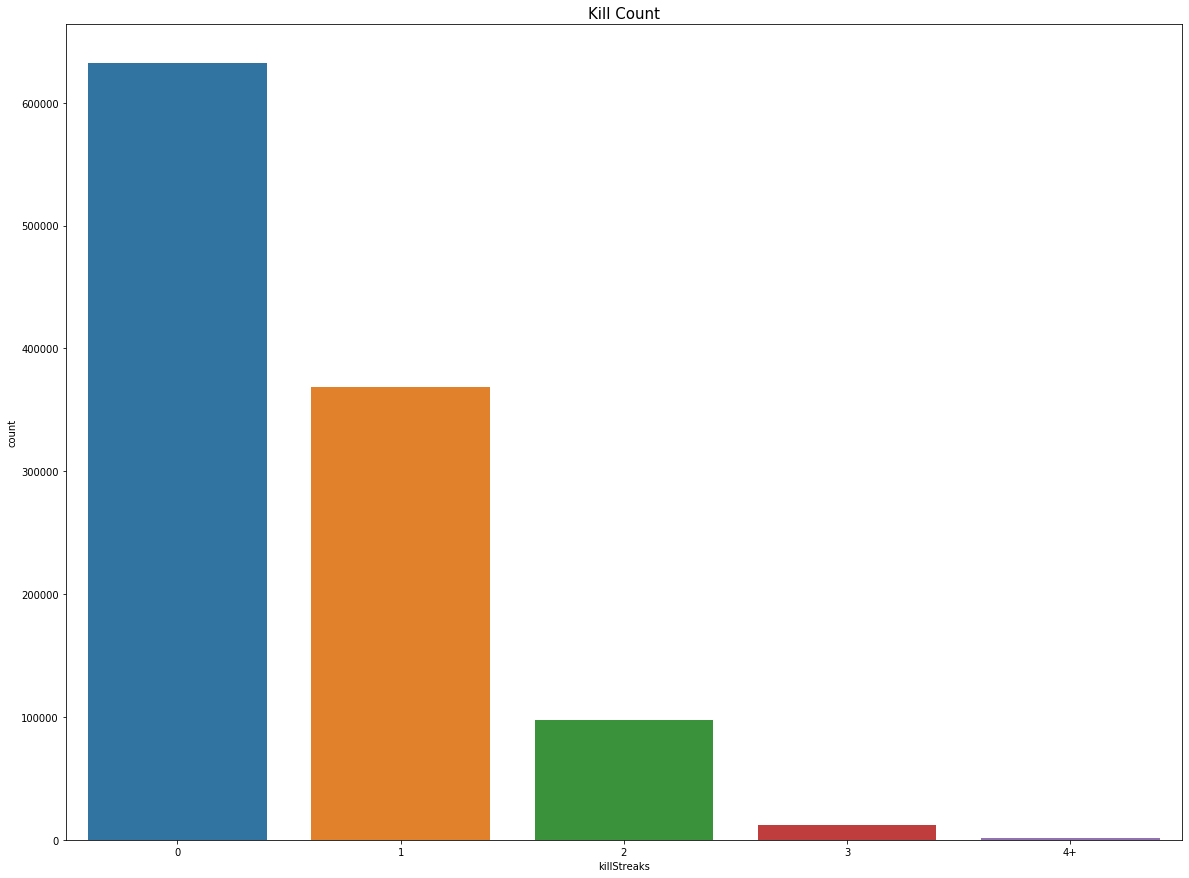

In [17]:
data = df.copy()
data.loc[data['killStreaks'] > data['killStreaks'].quantile(0.99)] = '4+'
plt.figure(figsize=(20,15))
sns.countplot(data['killStreaks'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()

#### Dealing with the 'matchType' column

In [24]:
# To check how many unique values are present in this categorical column: 

df['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

Text(0.5, 1.0, 'Match Type')

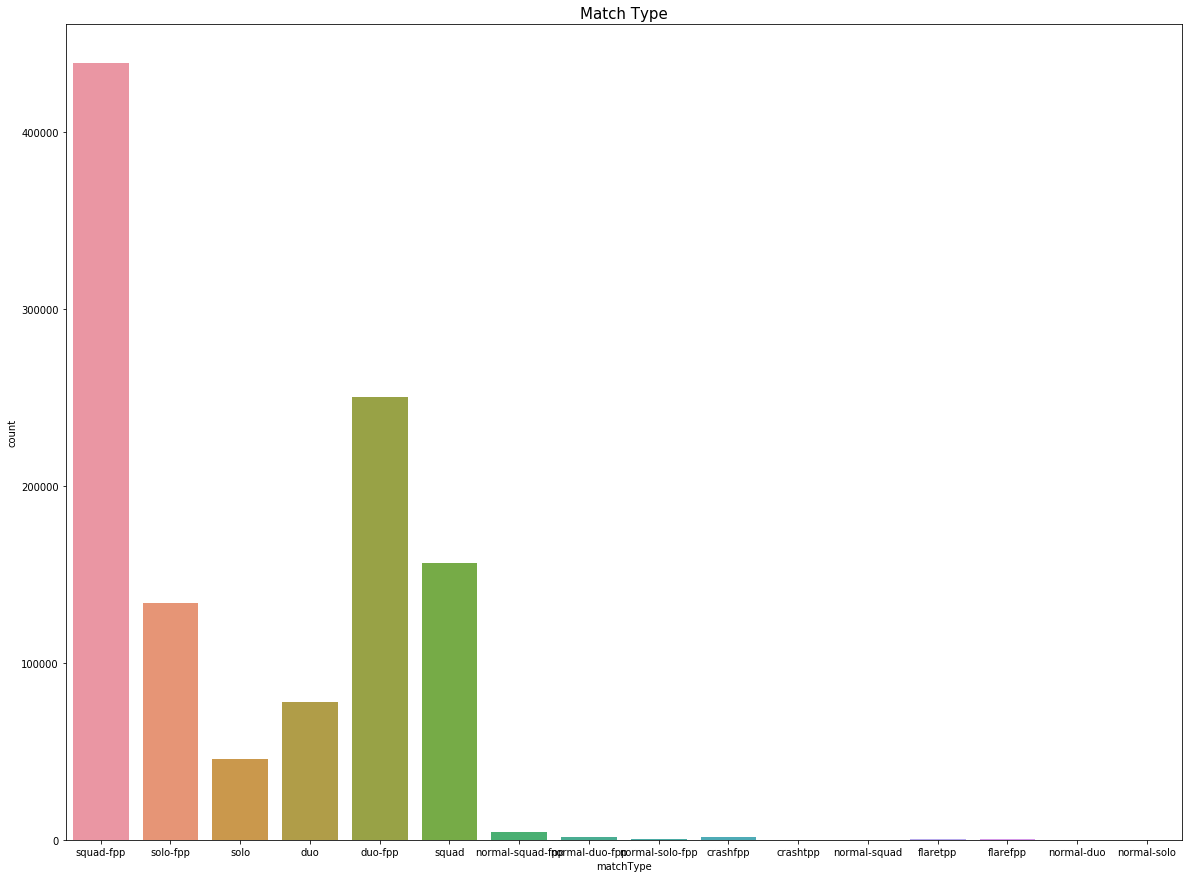

In [26]:
# To plot the above insights in form of 'countplot'

plt.figure(figsize=(20,15))
sns.countplot(df['matchType'], )
plt.title('Match Type',fontsize=15)

##### Observations :
- From the above graph, it is clear that the most played matchtype is **squad-fpp** 
- The least played matchtype is **normal-duo**

#### Damage to enemy players
We've seen that most people aren't able to kill any one, so maybe they inflict some damage to their enemies

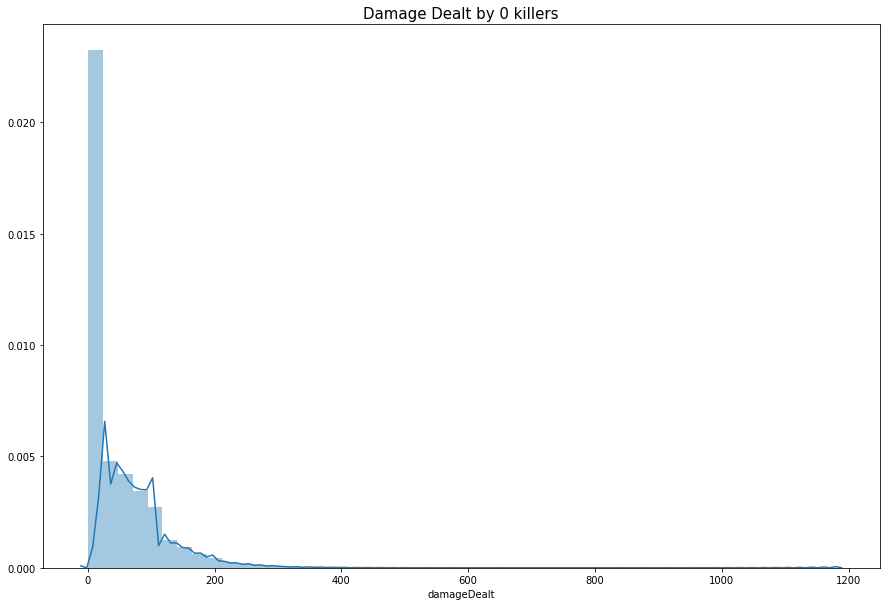

In [28]:
data = df.copy()

# Keep only those players that didn't kill anyone
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])

##### Ovservation:
- Here, we see a distribution of how much damage, players that dont kill anyone, can inflict on there enemies. We can see that most players dont deal out too much, this is most likely all the new players trying to figure out the controls and getting to know the game while they continually get beaten up by the more expereince players.

#### Lets have a look at the match duration for all the winners.

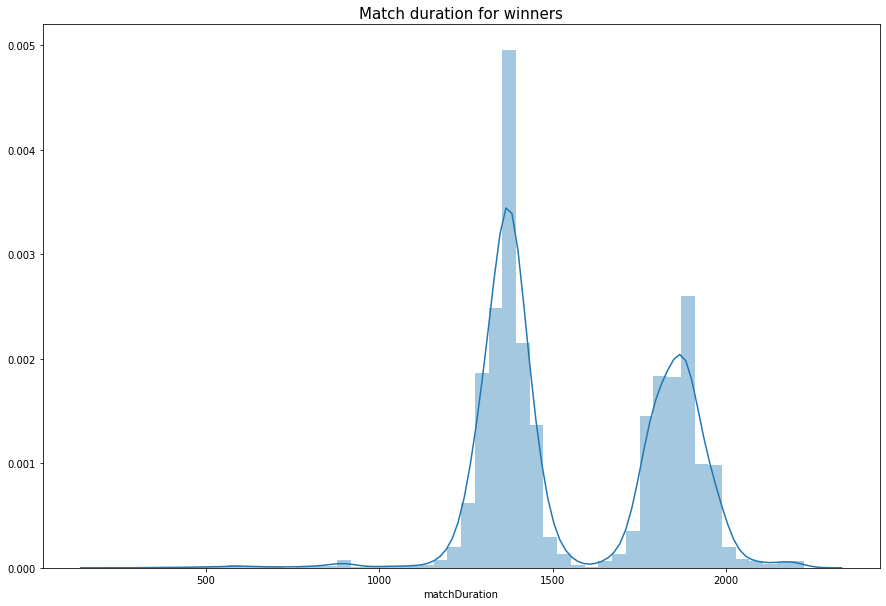

In [37]:
# Keep only the players that won the match
data = df[df['winPlacePerc'] == 1]

plt.figure(figsize=(15,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])

##### Observations:
- It appears that the match duration has no bearing on the winPlacePerc. Apparently you can even win the game in just over 2 min, but more commonly the game is won in approximately 1400 or 1850 seconds.
- The match Duration is not a feature that is likely to be useful in predicting the winPlacePer.

### Bivariate Analysis 

Bivariate analysis involves checking the relationship between two variables simultaneously.

Lets have a look at the data for this and see if there is any correlation to our target variable "winPlacePerc".

A **correlation** between two random vairables describes a statistical association, which basically means how close these two random variables are to having a linear relation ship. The correlation can range between -1 and 1:

- A correlation of 1 means the variables are perfectly correlated.
- A correlation of 0 means there is no corerlation between teh variables.
- A corerlation of -1 means the variabels are prefectly negatively corerlated

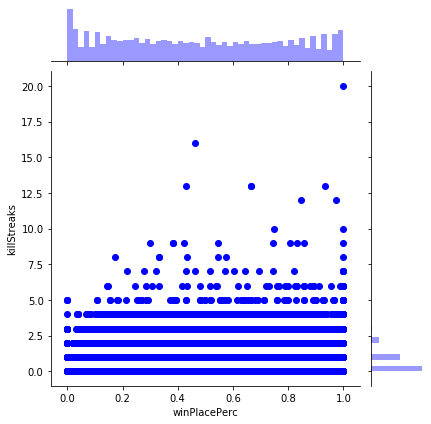

In [27]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, color='b')

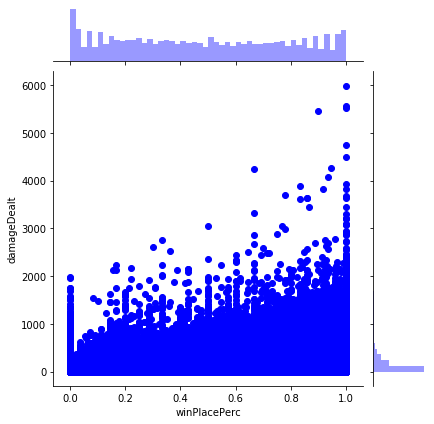

In [29]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=df, color='b')

There is a reasonable correlation here with the damadge we deal out to enemey players and the winPlacePerc.

#### Number of times a player killed a team mate
- This is the number of times a team member kills one of there own team.

In [30]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players on their own team'.format(df['teamKills'].mean()))
print('50% of people have killed ',df['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',df['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',df['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', df['teamKills'].max())

The average person kills 0.0240 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 10


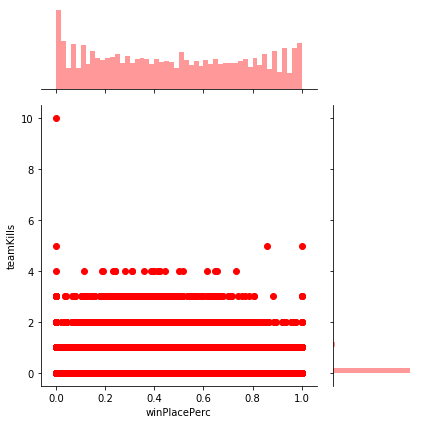

In [31]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='r')

#### Total distance travelled
This is not an existing feature in the data, but we can combine the distance features to forma a total distance measure, so see if this has any predictive power of our target variable.

In [32]:
# Create a new feature for total distance travelled
data = df[['winPlacePerc']].copy()
data['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# Summary statistics for the total distance travelled
print('The average person travelled {:.2f} m'.format(data['totalDistance'].mean()))
print('25% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.25)))
print('50% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.50)))
print('75% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.75)))
print('99% of people have travelled {:.2f} m or less'.format(data['totalDistance'].quantile(0.99)))
print('The longest distance travelled in the data is {:.2f} m'.format(data['totalDistance'].max()))

The average person travelled 1762.04 m
25% of people have travelled 158.30 m or less
50% of people have travelled 785.40 m or less
75% of people have travelled 2724.00 m or less
99% of people have travelled 9302.00 m or less
The longest distance travelled in the data is 37312.00 m


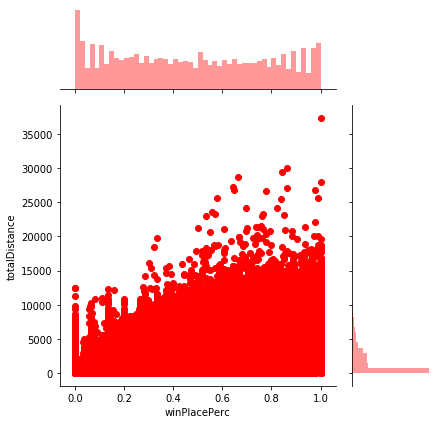

In [33]:
sns.jointplot(x='winPlacePerc', y='totalDistance', data=data, ratio=3, color='r')


##### Ovservation:
- There is a reasonably strong correlation with the total distance travelled and winning, although most of this correlation may just be due to the strong correlation with walking distance and winPlacePerc. However, one interesting item to note is that it looks like the person that travelled the longest distance didn't win, when they travelled over 41 kms in a single match.

#### Healing and using Boosts affect on the result
- Healing items are used to heal yourself after you've been injured, which improves your health and allows you to continue palying the game for longer
- Boost items are used by a player to increase speed and accuracy, which will allow a player to achieve more kills with weapons or get away from a fight faster.

In [34]:
# Summary statistics for the number of healing items used
print('The average person uses {:.2f} healing items'.format(df['heals'].mean()))
print('50% of people used {:.2f} healing items'.format(df['heals'].quantile(0.50)))
print('75% of people used {:.2f} healing items or less'.format(df['heals'].quantile(0.75)))
print('99% of people used {:.2f} healing items or less'.format(df['heals'].quantile(0.99)))
print('The doctor of the data used {:.2f} healing items'.format(df['heals'].max()))

The average person uses 1.37 healing items
50% of people used 0.00 healing items
75% of people used 2.00 healing items or less
99% of people used 12.00 healing items or less
The doctor of the data used 73.00 healing items


In [35]:
# Summary statistics for the number of boosting items used
print('The average person uses {:.2f} boosting items'.format(df['boosts'].mean()))
print('50% of people used {:.2f} boosting items'.format(df['boosts'].quantile(0.50)))
print('75% of people used {:.2f} boosting items or less'.format(df['boosts'].quantile(0.75)))
print('99% of people used {:.2f} boosting items or less'.format(df['boosts'].quantile(0.99)))
print('The addict of the data used {:.2f} boosting items'.format(df['boosts'].max()))

The average person uses 1.11 boosting items
50% of people used 0.00 boosting items
75% of people used 2.00 boosting items or less
99% of people used 7.00 boosting items or less
The addict of the data used 24.00 boosting items


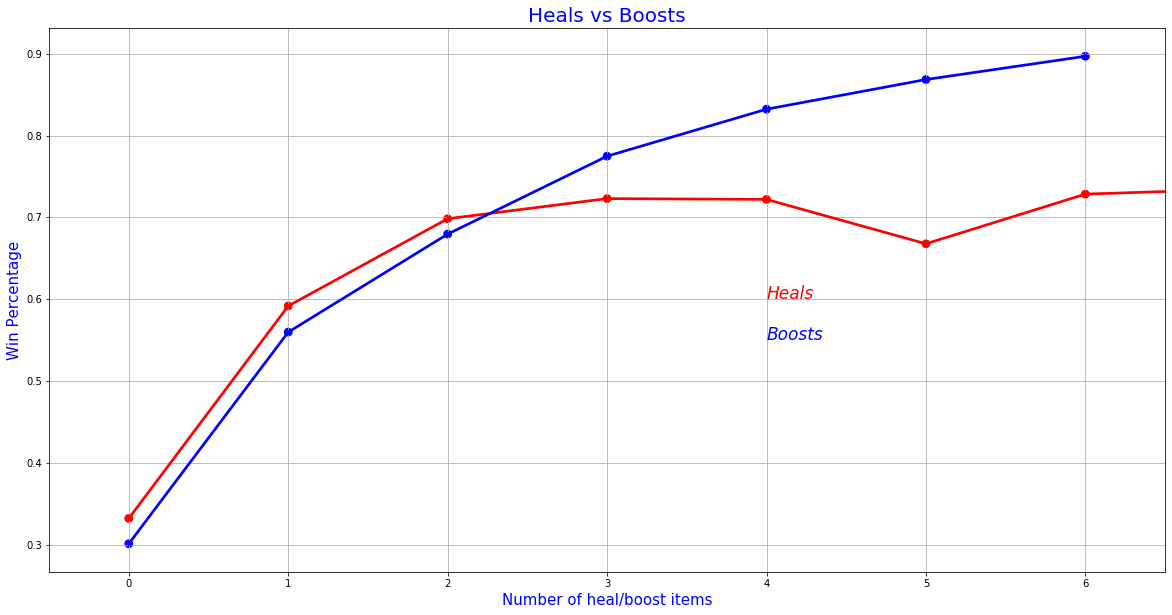

In [36]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=1.0)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

##### Observations:
- Here we can see how the heal items and boost items ae used compared to each other.
- This seems to indicate that using a few healing items increases your chance of winning, but you need to use more boosts to actaully achieve a change of winning.

### Multivariate analysis

#### Pearson correlation between all features

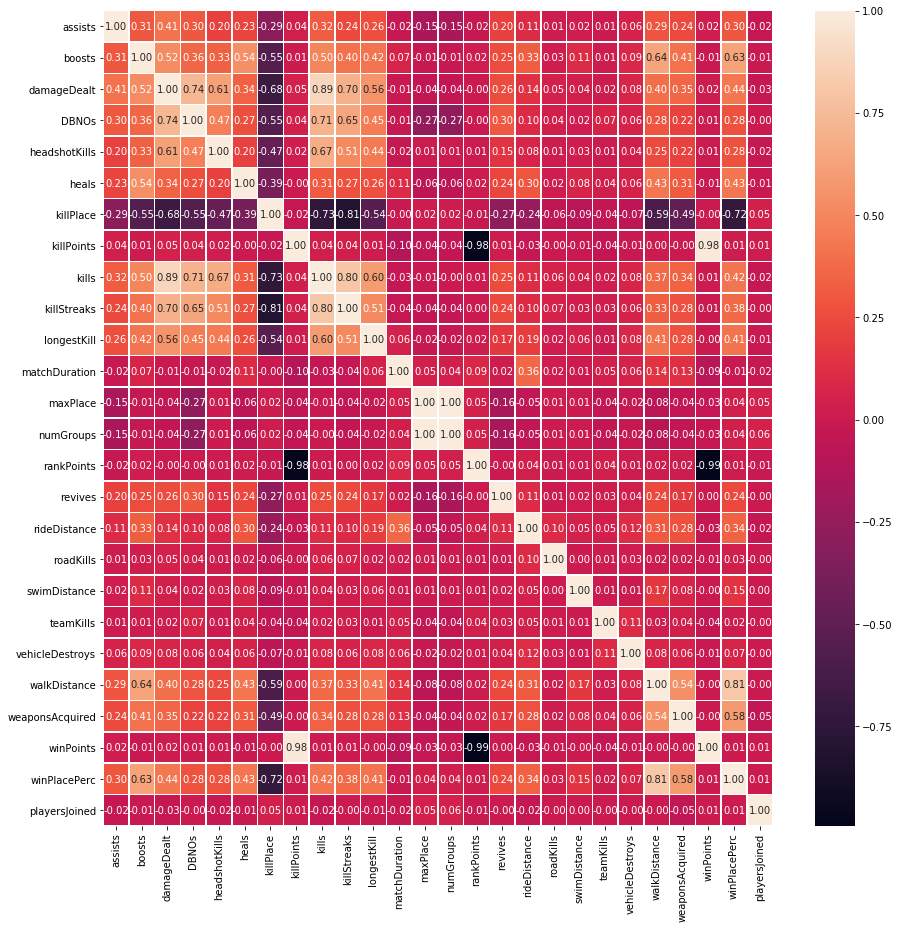

In [43]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

##### Observations:
- According to the colorbar we can find the correlation between different features.
- If correlation is positive, one variable increases with other.
- If correlation is negative, as one variable increases, the other decreases.
- if correlation is 1, it means that either the variables are same or they are almost same